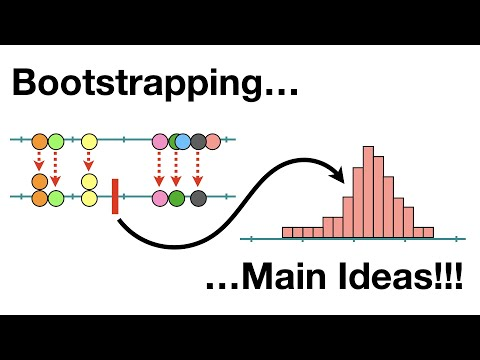

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

## 1.
- The standard deviation of the original data measures how spread out the individual data points are around the mean of that dataset. It provides a sense of variability or dispersion in the data itself.

- The standard error of the mean, measures how much the bootstrapped means would vary from the true population mean. In other words, SEM captures the uncertainty or precision of the sample mean as an estimate of the population mean.
## 2.
1. Calculate the mean of the sample data.
2. Determine the SEM, which is the standard deviation of the bootstrapped sample means or the original sample divided by the square root of the sample size.
3. Find the critical value from the normal distribution for a 95% confidence interval, which is approximately 2 (for large samples or if the population distribution is normal).
4. Multiply the SEM by the critical value 2 to get the margin of error.
5. Add and subtract this margin of error from the sample mean to get the confidence interval.

In formula terms, the confidence interval is:
CI=mean±(2×SEM)

This interval will "cover 95% of the bootstrapped sample means," meaning we are 95% confident the true population mean falls within this range.
## 3.
1. Resample the original data multiple times to generate a large set of bootstrapped sample means.
2. Sort these bootstrapped sample means in ascending order.
3. Determine the 2.5th and 97.5th percentiles of the sorted bootstrapped means. These percentiles represent the lower and upper bounds of the 95% confidence interval.
4. The confidence interval is then the range between these two percentile values, which will contain 95% of the bootstrapped means.
## 4. https://chatgpt.com/share/66fdb24b-1484-8012-a5d1-b74e02cf0bdb


In [2]:
import numpy as np

# Function to perform bootstrapping
def bootstrap_ci(data, num_resamples=10000, ci_percentile=95, statistic=np.mean):
    """
    Function to compute the bootstrap confidence interval for a given population statistic.
    
    Parameters:
    data : array-like, the sample data
    num_resamples : int, the number of bootstrap resamples (default: 10,000)
    ci_percentile : float, the desired confidence level (default: 95 for 95% CI)
    statistic : function, the population statistic to compute (default: np.mean)
    
    Returns:
    ci_lower : float, the lower bound of the confidence interval
    ci_upper : float, the upper bound of the confidence interval
    """
    # List to store the resampled statistics
    resampled_stats = []
    
    # Perform bootstrapping by resampling from the data
    for _ in range(num_resamples):
        resample = np.random.choice(data, size=len(data), replace=True)  # Resample with replacement
        resampled_stat = statistic(resample)  # Calculate the statistic (default is mean)
        resampled_stats.append(resampled_stat)
    
    # Compute the confidence interval percentiles
    ci_lower = np.percentile(resampled_stats, (100 - ci_percentile) / 2)
    ci_upper = np.percentile(resampled_stats, 100 - (100 - ci_percentile) / 2)
    
    return ci_lower, ci_upper

# Example usage
data = np.array([2, 5, 3, 8, 10, 9, 6, 7])  # Sample data
ci_lower, ci_upper = bootstrap_ci(data)  # Calculate 95% CI for the mean
print(f"95% bootstrap confidence interval for the mean: [{ci_lower:.2f}, {ci_upper:.2f}]")

# To calculate a 95% bootstrap confidence interval for a different statistic, 
# like the median instead of the mean, change the 'statistic' argument:

ci_lower_median, ci_upper_median = bootstrap_ci(data, statistic=np.median)  # 95% CI for the median
print(f"95% bootstrap confidence interval for the median: [{ci_lower_median:.2f}, {ci_upper_median:.2f}]")


95% bootstrap confidence interval for the mean: [4.38, 8.00]
95% bootstrap confidence interval for the median: [3.00, 9.00]


## 5.

- **Population parameters** (μ) describe the entire population and are typically unknown.
- **Sample statistics** (xbar) are calculated from sample data and used to estimate population parameters.
- Confidence intervals use sample statistics to provide a range that likely contains the population parameter. The sample statistic is the best estimate, while the population parameter is the unknown value being inferred.

## 6.
### 1. **What is bootstrapping?**
Bootstrapping is a method where you take your sample data and repeatedly resample from it with replacement to create new datasets. You then calculate a statistic, like the mean, from each one to estimate how much that statistic might vary.

### 2. **What’s the main purpose of bootstrapping?**
It helps estimate the variability or uncertainty of a statistic when you don't know the population distribution or don’t have a lot of data.

### 3. **How would you use bootstrapping to check a guess about a population average?**
You would create many bootstrap samples from your data, calculate the mean for each, and see how often your guessed average (like 50) shows up in the range of those means. If it’s far off, your guess might not be plausible. If it’s close, it might be reasonable!

## 7.
A confidence interval that overlaps zero suggests that the true population mean could be zero, which indicates that there is insufficient evidence to reject the null hypothesis (which states that there is no effect). This overlap implies that the observed sample mean, while it may not be zero, does not provide strong enough evidence to conclude that the drug has an average effect. In contrast, we would reject the null hypothesis if the CI does not include zero, suggesting that the sample data consistently supports a positive or negative effect of the drug, along with a corresponding p-value less than the significance level (e.g., 0.05), indicating statistical significance and a low likelihood that the observed effect is due to random sampling error.
## 8.https://chatgpt.com/share/66fdca03-ddfc-8012-b8aa-524165e72c6a

In this analysis, we want to determine if there is a significant positive change in health score from an initial assessment to a final assessment. To address this, we will perform a bootstrap resampling analysis and visualize the results.

### **Explanation of the Null Hypothesis ("No Effect")**

In the context of this analysis, the **null hypothesis** is that there is **no effect** on the health score over time. This implies that any observed changes in the health scores between the initial and final measurements are due to random chance, and there is no systematic improvement or decline in health over time. The alternative hypothesis is that there is a significant change in health scores.

- Null Hypothesis (H0): There is no change in health score (mean change = 0).
- Alternative Hypothesis (H1): There is a change in health score (mean change ≠ 0).

### **Data Visualization**

In [6]:
import pandas as pd

file_path = 'data.csv'
data = pd.read_csv(file_path)

data.head()


,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
0,1,45,M,84,86
1,2,34,F,78,86
2,3,29,M,83,80
3,4,52,F,81,86
4,5,37,M,81,84


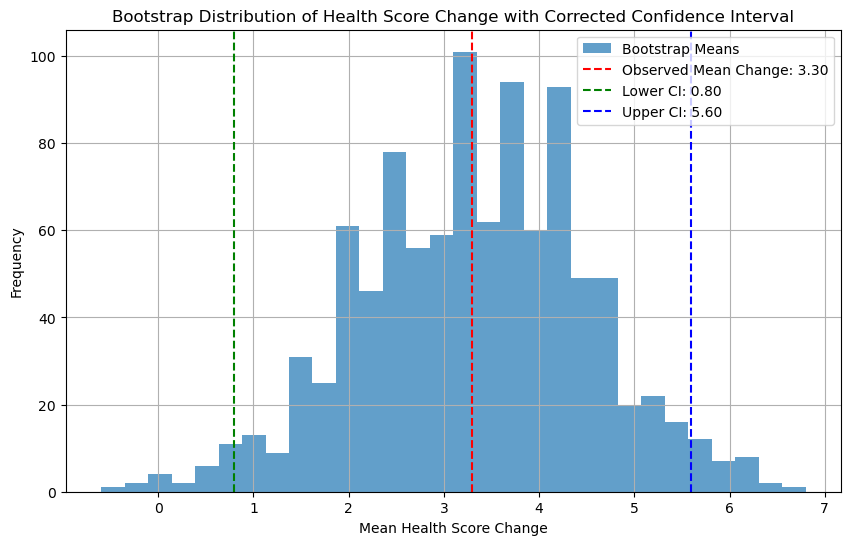

(3.3, array([0.8, 5.6]))

In [14]:
import numpy as np
import matplotlib.pyplot as plt

#calculate the difference between initial and final
data['HealthScoreChange'] = data['FinalHealthScore'] - data['InitialHealthScore']

#bootstrapping
n_iterations = 1000
sample_size = len(data)

bootstrap_means = []
for i in range(n_iterations):
    sample = data['HealthScoreChange'].sample(n=sample_size, replace=True)
    bootstrap_means.append(sample.mean())

observed_mean_change = data['HealthScoreChange'].mean()

#visualize the data
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, alpha=0.7, label='Bootstrap Means')
plt.axvline(observed_mean_change, color='r', linestyle='--', label=f'Observed Mean Change: {observed_mean_change:.2f}')
plt.axvline(np.percentile(bootstrap_means, 2.5), color='g', linestyle='--', label=f'Lower CI: {np.percentile(bootstrap_means, 2.5):.2f}')
plt.axvline(np.percentile(bootstrap_means, 97.5), color='b', linestyle='--', label=f'Upper CI: {np.percentile(bootstrap_means, 97.5):.2f}')
plt.title('Bootstrap Distribution of Health Score Change with Corrected Confidence Interval')
plt.xlabel('Mean Health Score Change')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

observed_mean_change, confidence_interval


### **Bootstrap Methodology**

To quantify whether the health score tends to go up over time, we apply a **bootstrap resampling method**. This allows us to assess the distribution of the mean health score changes without making strict assumptions about the underlying distribution of the data.

We conduct the following steps:
1. Resample the data (with replacement) to generate 1000 bootstrap samples.
2. For each sample, we compute the mean change in health score.
3. We then analyze the distribution of these resampled means to create a **confidence interval** (95%) for the mean health score change.
4. Finally, we compare this interval to zero to test the null hypothesis.

### **Methodology Code and Explanations**

This code first calculates the change in health scores, resamples the data, and generates a histogram of the bootstrap means. The graph includes the observed mean change, as well as the 95% confidence interval bounds.

### **Supporting Visualizations**

The histogram generated above shows the distribution of the mean changes in health scores across the bootstrap samples. We also included vertical lines that represent:
- **Red Line**: The observed mean change in the health score.
- **Green and Blue Lines**: The lower and upper bounds of the 95% confidence interval for the mean change in health scores.

### **Findings and Discussion**

From the analysis, the **observed mean change** in health scores is 3.3 points, which indicates an overall improvement. Additionally, the **95% confidence interval** ranges from 0.8 to 5.6, meaning that the true average health score change is likely between these values. Importantly, this interval does not contain zero, which suggests that there is a statistically significant positive change in health scores.

The fact that the confidence interval does not include zero provides strong evidence against the null hypothesis of no effect. In other words, we can reject the null hypothesis and conclude that there is a meaningful increase in health scores over time.


### **Conclusion Regarding the Null Hypothesis ("No Effect")**

Given that the observed mean change in health score is positive, and the confidence interval does not include zero, we reject the null hypothesis. There is significant evidence to suggest that patients' health scores tend to **increase** over time, indicating a positive effect.



## 9.✅